In [1]:
%load_ext watermark

In [2]:
%watermark -v -m -p numpy,scipy,pandas,matplotlib,statsmodels,sklearn -g

Python implementation: CPython
Python version       : 3.7.4
IPython version      : 7.8.0

numpy      : 1.17.2
scipy      : 1.4.1
pandas     : 1.0.3
matplotlib : 3.2.1
statsmodels: 0.11.1
sklearn    : 0.21.3

Compiler    : GCC 7.3.0
OS          : Linux
Release     : 5.4.0-62-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

Git hash: 77dafa42a619730d84e03949ac152177b92bb669



In [3]:
import os
import pickle
import pandas as pd
import numpy as np
import itertools
import warnings
#from tqdm.notebook import tqdm
from tqdm import tqdm

%matplotlib inline
from matplotlib import pyplot as plt

from sklearn.model_selection import learning_curve

In [4]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import LinearSVC

In [6]:
PATH_TO_DATA = './my_data'
ANSW = './answers'

In [7]:
def write_answer_to_file(answer, file_address):
    if isinstance(answer, list) or isinstance(answer, np.ndarray):
        with open(os.path.join(ANSW, file_address), 'w') as out_f:
            for idx, elmnt in enumerate(answer):
                if idx == 0:
                    out_f.write(str(elmnt))
                else:
                    out_f.write(' ' + str(elmnt))
    else:
        with open(os.path.join(ANSW, file_address), 'w') as out_f:
            out_f.write(str(answer))

## –ß–∞—Å—Ç—å 1. –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö –∞–ª–≥–æ—Ä–∏—Ç–º–æ–≤ –Ω–∞ —Å–µ—Å—Å–∏—è—Ö –∏–∑ 10 —Å–∞–π—Ç–æ–≤

In [8]:
with open(os.path.join(PATH_TO_DATA, 
         'X_sp_10users.pkl'), 'rb') as X_sparse_10users_pkl:
    X_sparse_10users = pickle.load(X_sparse_10users_pkl)
with open(os.path.join(PATH_TO_DATA, 
                       'y_10users.pkl'), 'rb') as y_10users_pkl:
    y_10users = pickle.load(y_10users_pkl)

X_sparse_10users.shape

(14061, 4913)

In [11]:
X_train, X_valid, y_train, y_valid = train_test_split(X_sparse_10users, y_10users, 
                                                      test_size=0.3, 
                                                     random_state=17, stratify=y_10users)
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=17)

In [12]:
def plot_validation_curves(param_values, grid_cv_results_):
    train_mu, train_std = grid_cv_results_['mean_train_score'], grid_cv_results_['std_train_score']
    #valid_mu, valid_std = grid_cv_results_['mean_test_score'], grid_cv_results_['std_test_score']
    train_line = plt.plot(param_values, train_mu, '-', label='train', color='green')
    #valid_line = plt.plot(param_values, valid_mu, '-', label='test', color='red')
    plt.fill_between(param_values, train_mu - train_std, train_mu + train_std, edgecolor='none',
                     facecolor=train_line[0].get_color(), alpha=0.2)
    #plt.fill_between(param_values, valid_mu - valid_std, valid_mu + valid_std, edgecolor='none',
    #                 facecolor=valid_line[0].get_color(), alpha=0.2)
    plt.legend()

KNeighborsClassifier

In [13]:
def get_metrics(inp_clf, inp_skf, inp_x_tr, inp_y_tr, inp_x_val, inp_y_val):
    acc_cv = []
    acc_val = 0
    
    for train_index, test_index in skf.split(inp_x_tr, inp_y_tr):
        clf = inp_clf
        clf.fit(inp_x_tr[train_index], inp_y_tr[train_index])
        predicted = clf.predict(inp_x_tr[test_index])
        acc_cv.append(accuracy_score(inp_y_tr[test_index], predicted))
        #print('Score: ', clf.score(inp_x_tr[test_index], inp_y_tr[test_index]))
    
    clf = inp_clf
    clf.fit(inp_x_tr, inp_y_tr)

    predicted = clf.predict(inp_x_val)
    acc_val = accuracy_score(inp_y_val, predicted)

    return acc_cv, acc_val

In [14]:
answ1_1, answ1_2 = get_metrics(KNeighborsClassifier(n_neighbors=100, n_jobs=-1), skf, X_train, y_train, X_valid, y_valid)

In [15]:
answ1 = [round(np.mean(answ1_1), 2), round(answ1_2, 2)]
answ1

[0.56, 0.58]

RandomForestClassifier

In [16]:
clfRF = RandomForestClassifier(n_estimators=100, n_jobs=-1, oob_score=True, random_state=17)

In [17]:
oob_score, acc_rf = get_metrics(clfRF, skf, X_train, y_train, X_valid, y_valid)
oob_score, acc_rf

([0.7214611872146118, 0.7136322049405307, 0.714765100671141],
 0.7312159279450107)

In [18]:
answ2 = [round(np.mean(oob_score), 2), round(acc_rf, 2)]
answ2

[0.72, 0.73]

In [19]:
write_answer_to_file(answ2, 'answer4_2.txt')

LogisticRegression

In [20]:
clfLR = LogisticRegression(random_state=17, n_jobs=-1)

In [21]:
acc_cv_lr, acc_lr = get_metrics(clfLR, skf, X_train, y_train, X_valid, y_valid)
acc_cv_lr, acc_lr

/home/voloch/Anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/voloch/Anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/voloch/Anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


([0.7622526636225266, 0.7605977432143947, 0.7647956070774863],
 0.7817018250770325)

In [22]:
%%time
logit_c_values1 = np.logspace(-4, 2, 10)

logit_grid_searcher1 = LogisticRegressionCV(Cs = logit_c_values1, multi_class='multinomial'
                                            , cv = skf, random_state=17, n_jobs=-1)
logit_grid_searcher1.fit(X_train, y_train)

CPU times: user 3.85 s, sys: 113 ms, total: 3.96 s
Wall time: 7.98 s


/home/voloch/Anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegressionCV(Cs=array([1.00000000e-04, 4.64158883e-04, 2.15443469e-03, 1.00000000e-02,
       4.64158883e-02, 2.15443469e-01, 1.00000000e+00, 4.64158883e+00,
       2.15443469e+01, 1.00000000e+02]),
                     class_weight=None,
                     cv=StratifiedKFold(n_splits=3, random_state=17, shuffle=True),
                     dual=False, fit_intercept=True, intercept_scaling=1.0,
                     l1_ratios=None, max_iter=100, multi_class='multinomial',
                     n_jobs=-1, penalty='l2', random_state=17, refit=True,
                     scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [23]:
def get_metrics_v2(inp_logit_c_values, inp_logit_grid_searcher):

    ret_df = pd.DataFrame(index = inp_logit_c_values, columns = [])

    score_list = []
    # class
    for idx, el in enumerate(list(inp_logit_grid_searcher.scores_.values())):
        ret_df['class' + str(idx) + str(0)] = el[0]
        ret_df['class' + str(idx) + str(1)] = el[1]
        ret_df['class' + str(idx) + str(2)] = el[2]

    ret_df['mean_train_score'] = ret_df.mean(axis = 1)
    ret_df['std_train_score'] = ret_df.std(axis = 1)
    
    return ret_df

In [24]:
df = get_metrics_v2(logit_c_values1, logit_grid_searcher1)
df[['mean_train_score', 'std_train_score']]

mean_train_score  std_train_score
0.000100            0.316799         0.007629
0.000464            0.473586         0.004157
0.002154            0.554767         0.002035
0.010000            0.648551         0.006874
0.046416            0.715507         0.002683
0.215443            0.750054         0.003652
1.000000            0.760923         0.001994
4.641589            0.762549         0.001234
21.544347           0.756451         0.001824
100.000000          0.744871         0.005548

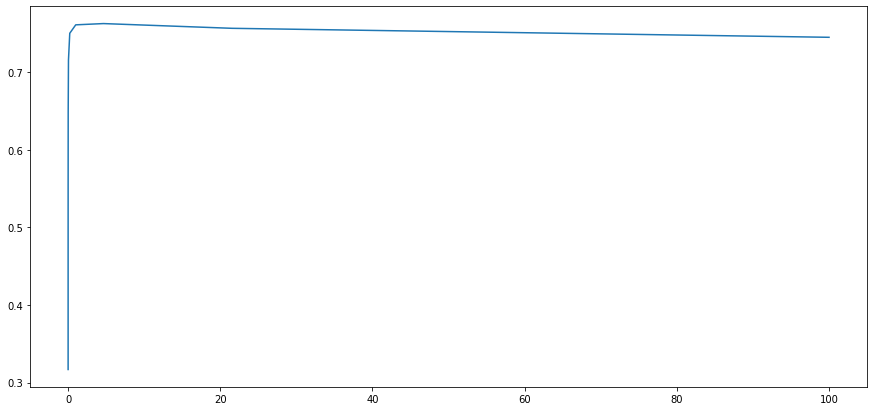

In [25]:
plt.figure(figsize = (15, 7))
plt.plot(logit_grid_searcher1.Cs_, df['mean_train_score']);

In [26]:
print(max(df['mean_train_score']))
print(df[df['mean_train_score'] == max(df['mean_train_score'])].index)

0.7625486092810018
Float64Index([4.641588833612772], dtype='float64')


In [27]:
%%time
logit_c_values2 = np.logspace(0.1, 7, 20)

logit_grid_searcher2 = LogisticRegressionCV(Cs = logit_c_values2, multi_class='multinomial'
                                            , cv = skf, random_state=17, n_jobs=-1)
logit_grid_searcher2.fit(X_train, y_train)

df2 = get_metrics_v2(logit_c_values2, logit_grid_searcher2)
df2[['mean_train_score', 'std_train_score']]

CPU times: user 3.99 s, sys: 50.1 ms, total: 4.04 s
Wall time: 21.2 s


/home/voloch/Anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


mean_train_score  std_train_score
1.258925e+00          0.762956         0.003246
2.905079e+00          0.763768         0.001727
6.703719e+00          0.761330         0.000961
1.546941e+01          0.756553         0.000377
3.569699e+01          0.752490         0.001641
8.237387e+01          0.744971         0.003488
1.900848e+02          0.742939         0.004079
4.386370e+02          0.740196         0.003332
1.012193e+03          0.740095         0.002855
2.335721e+03          0.737352         0.002371
5.389878e+03          0.737454         0.002970
1.243761e+04          0.736945         0.002868
2.870085e+04          0.734202         0.004087
6.622968e+04          0.733694         0.003877
1.528307e+05          0.733695         0.004375
3.526699e+05          0.733491         0.004021
8.138162e+05          0.732171         0.004141
1.877951e+06          0.732475         0.003452
4.333533e+06          0.731155         0.004110
1.000000e+07          0.730545         0.002802

In [28]:
print(max(df2['mean_train_score']))
print(df2[df2['mean_train_score'] == max(df2['mean_train_score'])].index)

0.7637679367638022
Float64Index([2.9050786505108603], dtype='float64')


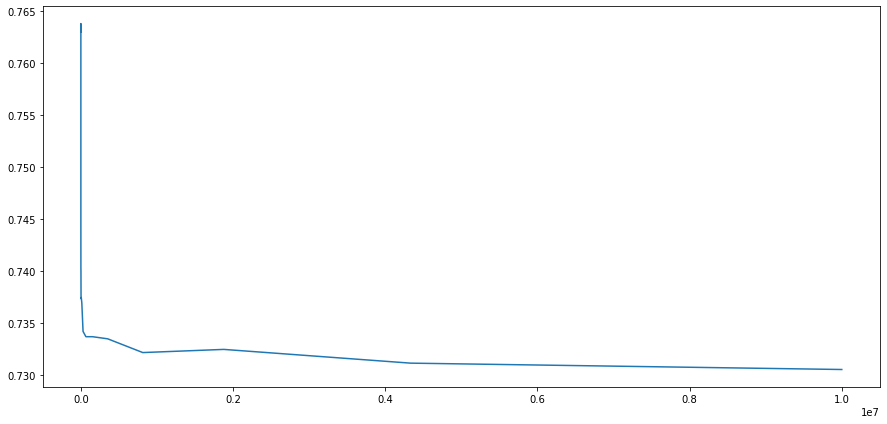

In [29]:
plt.figure(figsize = (15, 7))
plt.plot(logit_grid_searcher2.Cs_, df2['mean_train_score']);

In [30]:
logit_cv_acc = accuracy_score(y_valid, logit_grid_searcher2.predict(X_valid))
logit_cv_acc

0.7798056411471913

In [31]:
answ3 = [round(max(df2['mean_train_score']), 2), round(logit_cv_acc, 2)]
answ3

[0.76, 0.78]

In [32]:
write_answer_to_file(answ3, 'answer4_3.txt')

LinearSVC

In [31]:
clf_inp = LinearSVC(C = 1, random_state = 17)
acc_cv, acc_val = get_metrics(clf_inp, skf, X_train, y_train, X_valid, y_valid)
acc_cv, acc_val

/home/voloch/Anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


([0.7567732115677321, 0.7532784385483379, 0.7593044539353264],
 0.7769613652524295)

In [32]:
%%time
svm_params1 = {'C': np.linspace(1e-4, 1e4, 10)}

svm_grid_searcher1 = GridSearchCV(LinearSVC(random_state = 17), svm_params1, n_jobs=-1, return_train_score = True)
svm_grid_searcher1.fit(X_train, y_train)

/home/voloch/Anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


CPU times: user 2.53 s, sys: 11.7 ms, total: 2.54 s
Wall time: 14.8 s


/home/voloch/Anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=17, tol=0.0001, verbose=0),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([1.0000000e-04, 1.1111112e+03, 2.2222223e+03, 3.3333334e+03,
       4.4444445e+03, 5.5555556e+03, 6.6666667e+03, 7.7777778e+03,
       8.8888889e+03, 1.0000000e+04])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [33]:
print(svm_grid_searcher1.best_score_)
print(svm_grid_searcher1.best_params_)

0.6848201585043691
{'C': 7777.777800000001}


In [34]:
print(max(svm_grid_searcher1.cv_results_['mean_train_score']))
print(svm_grid_searcher1.cv_results_['mean_train_score'][7])
print(svm_grid_searcher1.cv_results_['params'][7])

0.8755810871118718
0.8755810871118718
{'C': 7777.777800000001}


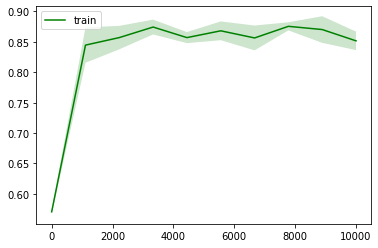

In [35]:
plot_validation_curves(svm_params1['C'], svm_grid_searcher1.cv_results_)

In [36]:
%%time
svm_params2 = {'C': np.linspace(1e-3, 1, 30)}

svm_grid_searcher2 = GridSearchCV(LinearSVC(random_state = 17), svm_params2, n_jobs=-1, return_train_score = True)
svm_grid_searcher2.fit(X_train, y_train)

/home/voloch/Anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


CPU times: user 767 ms, sys: 19.7 ms, total: 786 ms
Wall time: 24.1 s


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=17, tol=0.0001, verbose=0),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([0.001     , 0.03544828, 0.06989655, 0.10434483, 0.1387931 ,
       0.17324138, 0.20768966, 0.24213793, 0.27658621, 0.31103448,
       0.34548276, 0.37993103, 0.41437931, 0.44882759, 0.48327586,
       0.51772414, 0.55217241, 0.58662069, 0.62106897, 0.65551724,
       0.68996552, 0.72441379, 0.75886207, 0.79331034, 0.82775862,
       0.8622069 , 0.89665517, 0.93110345, 0.96555172, 1.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [37]:
print(svm_grid_searcher2.best_score_)
print(list(svm_grid_searcher2.best_params_.values())[0])

0.7661044503149766
0.13879310344827586


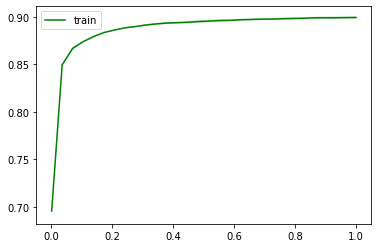

In [38]:
plot_validation_curves(svm_params2['C'], svm_grid_searcher2.cv_results_)

In [39]:
clfSVC = LinearSVC(C = list(svm_grid_searcher2.best_params_.values())[0], random_state=17)
clfSVC.fit(X_train, y_train)
svm_cv_acc = accuracy_score(y_valid, clfSVC.predict(X_valid))
svm_cv_acc

0.7817018250770325

In [40]:
print(max(svm_grid_searcher2.cv_results_['mean_train_score']))
print(svm_grid_searcher2.cv_results_['mean_train_score'][4])
print(svm_grid_searcher2.cv_results_['params'][4])

0.8993599000817655
0.8792925829596715
{'C': 0.13879310344827586}


In [41]:
svc_acc_cv, svc_acc_val = get_metrics(LinearSVC(C = list(svm_grid_searcher2.best_params_.values())[0], random_state = 17), skf, X_train, y_train, X_valid, y_valid)
svc_acc_cv, svc_acc_val

([0.7649923896499239, 0.7615126562976517, 0.7660158633312996],
 0.7817018250770325)

In [42]:
answ4_4_2 = svc_acc_val

In [43]:
answ4_4_1 = np.mean(svc_acc_cv)#svm_cv_acc#accuracy_score(y_valid, svm_grid_searcher2.predict(X_valid))

In [44]:
answ4_4 = [round(answ4_4_1, 2), round(answ4_4_2, 2)]
answ4_4

[0.76, 0.78]

In [45]:
write_answer_to_file(answ4_4, 'answer4_4.txt')

# –ß–∞—Å—Ç—å 2. –í—ã–±–æ—Ä –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ ‚Äì –¥–ª–∏–Ω—ã —Å–µ—Å—Å–∏–∏ –∏ —à–∏—Ä–∏–Ω—ã –æ–∫–Ω–∞

In [46]:
def model_assessment(estimator, path_to_X_pickle, path_to_y_pickle, cv, random_state=17, test_size=0.3):
    '''
    Estimates CV-accuracy for (1 - test_size) share of (X_sparse, y) 
    loaded from path_to_X_pickle and path_to_y_pickle and holdout accuracy for (test_size) share of (X_sparse, y).
    The split is made with stratified train_test_split with params random_state and test_size.
    
    :param estimator ‚Äì Scikit-learn estimator (classifier or regressor)
    :param path_to_X_pickle ‚Äì path to pickled sparse X (instances and their features)
    :param path_to_y_pickle ‚Äì path to pickled y (responses)
    :param cv ‚Äì cross-validation as in cross_val_score (use StratifiedKFold here)
    :param random_state ‚Äì  for train_test_split
    :param test_size ‚Äì  for train_test_split
    
    :returns mean CV-accuracy for (X_train, y_train) and accuracy for (X_valid, y_valid) where (X_train, y_train)
    and (X_valid, y_valid) are (1 - test_size) and (testsize) shares of (X_sparse, y).
    '''
    
    with open(path_to_X_pickle, 'rb') as X_pkl:
        X_inner = pickle.load(X_pkl)
    with open(path_to_y_pickle, 'rb') as y_pkl:
        y_inner = pickle.load(y_pkl)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_inner, y_inner, 
                                                      test_size=test_size, 
                                                     random_state=random_state, stratify=y_inner)
    #skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=random_state)
    ret_acc_cv = []
    #for train_index, test_index in skf.split(X_train, y_train):
    for train_index, test_index in cv.split(X_train, y_train):
        clf = estimator
        clf.fit(X_train[train_index], y_train[train_index])
        predicted = clf.predict(X_train[test_index])
        ret_acc_cv.append(accuracy_score(y_train[test_index], predicted))
        
    clf = estimator
    clf.fit(X_train, y_train)
    ret_acc_val = accuracy_score(y_valid, clf.predict(X_valid))
    
    return np.mean(ret_acc_cv), ret_acc_val

In [47]:
model_assessment(svm_grid_searcher2.best_estimator_
                 , os.path.join(PATH_TO_DATA, 'X_sp_10users.pkl')
                 , os.path.join(PATH_TO_DATA, 'y_10users.pkl')
                 , skf, random_state=17, test_size=0.3)

(0.7641736364262918, 0.7817018250770325)

In [48]:
%%time
estm = svm_grid_searcher2.best_estimator_
skf  = StratifiedKFold(n_splits=3, shuffle=True, random_state=17)
results = {}

for window_size, session_length in itertools.product([10, 7, 5], [15, 10, 7, 5]):
    if window_size <= session_length:
        path_to_X_pkl = os.path.join(PATH_TO_DATA, f'X_sparse_10users_s{session_length}_w{window_size}.pkl')
        #path_to_y_pkl = os.path.join(PATH_TO_DATA, f'Y_sparse_10users_s{session_length}_w{window_size}.pkl')
        path_to_y_pkl = os.path.join(PATH_TO_DATA, f'Y_sparse_10users_s{session_length}_w{window_size}.pkl')
        #print(path_to_X_pkl)
        acc_cv, acc_val = model_assessment(svm_grid_searcher2.best_estimator_ 
                         , path_to_X_pkl
                         , path_to_y_pkl 
                         , cv = skf, random_state=17, test_size=0.3)
        results[f's{session_length}_w{window_size}'] = (acc_cv, acc_val)

/home/voloch/Anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/voloch/Anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/voloch/Anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


CPU times: user 29.5 s, sys: 16.7 ms, total: 29.5 s
Wall time: 29.6 s


In [49]:
results

{'s15_w10': (0.8259531982725311, 0.8400094809196492),
 's10_w10': (0.7641736364262918, 0.7817018250770325),
 's15_w7': (0.8504951852074757, 0.8544881367181019),
 's10_w7': (0.8001385385477496, 0.8075327692052431),
 's7_w7': (0.7512069688975528, 0.7629002820640451),
 's15_w5': (0.8706948653050466, 0.8764817449027975),
 's10_w5': (0.816431449231953, 0.8253911806543386),
 's7_w5': (0.773092677463695, 0.7871028923660502),
 's5_w5': (0.7230970052618901, 0.7367235656709341)}

In [50]:
answ4_5_1 = results['s15_w5'][0]
answ4_5_2 = results['s15_w5'][1]
answ4_5_1, answ4_5_2

(0.8706948653050466, 0.8764817449027975)

In [51]:
answ4_5 = [round(answ4_5_1, 2), round(answ4_5_2, 2)]
answ4_5

[0.87, 0.88]

In [52]:
write_answer_to_file(answ4_5, 'answer4_5.txt')

In [63]:
%%time
estm = svm_grid_searcher2.best_estimator_
skf  = StratifiedKFold(n_splits=3, shuffle=True, random_state=17)
results150 = {}

for window_size, session_length in tqdm(itertools.product([10, 7, 5], [15, 10, 7, 5])):
    if window_size <= session_length:
        path_to_X_pkl = os.path.join(PATH_TO_DATA, f'X_sparse_150users_s{session_length}_w{window_size}.pkl')
        #path_to_y_pkl = os.path.join(PATH_TO_DATA, f'Y_sparse_10users_s{session_length}_w{window_size}.pkl')
        path_to_y_pkl = os.path.join(PATH_TO_DATA, f'Y_sparse_150users_s{session_length}_w{window_size}.pkl')
        #print(path_to_X_pkl)
        acc_cv, acc_val = model_assessment(svm_grid_searcher2.best_estimator_ 
                         , path_to_X_pkl
                         , path_to_y_pkl 
                         , cv = skf, random_state=17, test_size=0.3)
        results150[f's{session_length}_w{window_size}'] = (acc_cv, acc_val)

0it [00:00, ?it/s]/home/voloch/Anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
2it [09:18, 306.12s/it]/home/voloch/Anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
7it [28:31, 275.23s/it]/home/voloch/Anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
12it [1:01:05, 305.43s/it]

CPU times: user 1h 1min 21s, sys: 1.49 s, total: 1h 1min 22s
Wall time: 1h 1min 5s


In [64]:
results150

{'s15_w10': (0.550363371512566, 0.5766798034350217),
 's10_w10': (0.4616145225656354, 0.48447915146207365),
 's15_w7': (0.5842562089277951, 0.6113022447797799),
 's10_w7': (0.502628509268666, 0.5261266478182376),
 's7_w7': (0.4374078763743305, 0.45415062847021154),
 's15_w5': (0.6165801657473978, 0.6391930695478659),
 's10_w5': (0.5275663749787812, 0.5487905776999076),
 's7_w5': (0.46695200044261503, 0.4830510536818027),
 's5_w5': (0.4093985555889958, 0.42267727648805176)}

–ö–∞–∫ –º—ã –≤–∏–¥–∏–º –≤ –æ–±–æ–∏—Ö –≤—ã—Ä–∏–∞–Ω—Ç–∞—Ö –ª—É—á—à–µ–µ —Ä–µ—à–µ–Ω–∏–µ —Å —Å–∞–º–æ–π –¥–ª–∏–Ω–Ω–æ–π —Å–µ—Å—Å–∏–µ–π.    
–®–∏—Ä–∏–Ω–∞ –æ–∫–Ω–∞ —Å–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ —Å–∫–∞–∑—ã–≤–∞–µ—Ç—Å—è –Ω–∞ –æ–±—ä–µ–º–µ —Å–µ—Å—Å–∏–π –≤ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ.

In [65]:
answ4_6_1, answ4_6_2 = results150['s10_w10']

In [66]:
answ4_6 = [round(answ4_6_1, 2), round(answ4_6_2, 2)]
answ4_6

[0.46, 0.48]

In [67]:
write_answer_to_file(answ4_6, 'answer4_6.txt')

# –ß–∞—Å—Ç—å 3. –ò–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ü–∏—è  –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ–≥–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è –∏ –∫—Ä–∏–≤—ã–µ –æ–±—É—á–µ–Ω–∏—è

In [68]:
with open(os.path.join(PATH_TO_DATA, 'X_sp_150users.pkl'), 'rb') as X_sparse_150users_pkl:
     X_sparse_150users = pickle.load(X_sparse_150users_pkl)
with open(os.path.join(PATH_TO_DATA, 'y_150users.pkl'), 'rb') as y_150users_pkl:
    y_150users = pickle.load(y_150users_pkl)
    
X_train_150, X_valid_150, y_train_150, y_valid_150 = train_test_split(X_sparse_150users, 
                                                                      y_150users, test_size=0.3, 
                                                     random_state=17, stratify=y_150users)

In [114]:
%%time
warnings.filterwarnings('ignore')

logit_cv_150users = LogisticRegressionCV(Cs =[logit_grid_searcher2.Cs_[10]], multi_class='ovr'
                                            , cv = skf, random_state=17, n_jobs=-1)
logit_cv_150users.fit(X_train_150, y_train_150)

warnings.filterwarnings('default')

CPU times: user 9min 21s, sys: 7.97 s, total: 9min 29s
Wall time: 4min 24s


In [127]:
cv_scores_by_user = {}
for user_id in logit_cv_150users.scores_:
    cv_scores_by_user[user_id] = np.mean([float(logit_cv_150users.scores_[user_id][0])\
                                        , float(logit_cv_150users.scores_[user_id][1])\
                                        , float(logit_cv_150users.scores_[user_id][2])]
                                        , axis = 0
                                        )
    print(f'User {user_id}, CV score: {cv_scores_by_user[user_id]}')

User 6, CV score: 0.9959438402938933
User 13, CV score: 0.9965075294693774
User 15, CV score: 0.9950161882777585
User 16, CV score: 0.9912525885634165
User 28, CV score: 0.9904598628032559
User 31, CV score: 0.9934214717926885
User 33, CV score: 0.9932752620272175
User 39, CV score: 0.9855288590840804
User 46, CV score: 0.997789732638407
User 49, CV score: 0.9948913550321911
User 50, CV score: 0.993817742188117
User 53, CV score: 0.9933063099001623
User 65, CV score: 0.9964131387926516
User 66, CV score: 0.9942655594826375
User 82, CV score: 0.995871345368068
User 85, CV score: 0.9960692551173956
User 89, CV score: 0.9894385766030759
User 92, CV score: 0.9941405209595006
User 100, CV score: 0.9939633059333784
User 102, CV score: 0.9912208113418622
User 103, CV score: 0.9808686140363952
User 105, CV score: 0.9967994250288541
User 106, CV score: 0.9946728615061756
User 118, CV score: 0.9910855440879641
User 119, CV score: 0.9964760815698988
User 120, CV score: 0.9936296436790316
User 126

—Ä–∞–∑–Ω–∏—Ü—É –º–µ–∂–¥—É –¥–æ–ª–µ–π –ø—Ä–∞–≤–∏–ª—å–Ω—ã—Ö –æ—Ç–≤–µ—Ç–æ–≤ –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏ (—Ç–æ–ª—å–∫–æ —á—Ç–æ –ø–æ—Å—á–∏—Ç–∞–Ω–Ω—É—é —Å –ø–æ–º–æ—â—å—é LogisticRegressionCV) –∏ 
–¥–æ–ª–µ–π –º–µ—Ç–æ–∫ –≤ y_train_150, –æ—Ç–ª–∏—á–Ω—ã—Ö –æ—Ç ID —ç—Ç–æ–≥–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è (–∏–º–µ–Ω–Ω–æ —Ç–∞–∫—É—é –¥–æ–ª—é –ø—Ä–∞–≤–∏–ª—å–Ω—ã—Ö –æ—Ç–≤–µ—Ç–æ–≤ –º–æ–∂–Ω–æ –ø–æ–ª—É—á–∏—Ç—å, –µ—Å–ª–∏ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä –≤—Å–µ–≥–¥–∞ "–≥–æ–≤–æ—Ä–∏—Ç", —á—Ç–æ —ç—Ç–æ –Ω–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å —Å –Ω–æ–º–µ—Ä–æ–º ùëñ –≤ –∑–∞–¥–∞—á–µ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ ùëñ-vs-All).

In [137]:
class_distr = np.bincount(y_train_150.astype('int'))
acc_diff_vs_constant = []

for user_id in np.unique(y_train_150):
    same = 0
    for el in y_train_150:
        if el == user_id:
            same += 1
            
    #print(1 - same/y_train_150.shape[0])
    acc_diff_vs_constant.append(cv_scores_by_user[user_id] - (1 - same/y_train_150.shape[0]))

In [138]:
num_better_than_default = (np.array(acc_diff_vs_constant) > 0).sum()
num_better_than_default

87

In [130]:
answ4_7 = round(1 - num_better_than_default/len(np.unique(y_train_150)), 2)
answ4_7

0.42

In [121]:
write_answer_to_file(answ4_7, 'answer4_7.txt')

In [154]:
y_binary_128 = [int(el == 128) for el in y_train_150]

In [156]:
sum(y_binary_128)

1957

In [158]:
def plot_learning_curve(val_train, val_test, train_sizes, 
                        xlabel='Training Set Size', ylabel='score'):
    def plot_with_err(x, data, **kwargs):
        mu, std = data.mean(1), data.std(1)
        lines = plt.plot(x, mu, '-', **kwargs)
        plt.fill_between(x, mu - std, mu + std, edgecolor='none',
                         facecolor=lines[0].get_color(), alpha=0.2)
    plot_with_err(train_sizes, val_train, label='train')
    plot_with_err(train_sizes, val_test, label='valid')
    plt.xlabel(xlabel); plt.ylabel(ylabel)
    plt.legend(loc='lower right');

In [159]:
%%time
train_sizes = np.linspace(0.25, 1, 20)
estimator = svm_grid_searcher2.best_estimator_
n_train, val_train, val_test = learning_curve(estimator, X_train_150, y_train_150,
                                             train_sizes = train_sizes
                                             , cv = skf, random_state=om_state = 17
                                             , n_jobs = -1
                                             )

/home/voloch/Anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


CPU times: user 24min 34s, sys: 2.2 s, total: 24min 36s
Wall time: 24min 37s


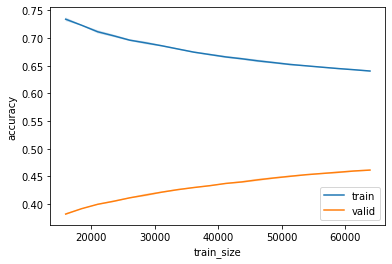

In [160]:
plot_learning_curve(val_train, val_test, n_train, 
                    xlabel='train_size', ylabel='accuracy')